In [1]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: webencodings in c:\users\jeremy\appdata\local\programs\python\python37\lib\site-packages (from bleach->nbconvert->notebook>=4.4.1->widgetsnbextension~=3.6.0->ipywidgets) (0.5.1)



In [2]:
!pip install -U tensorflow_datasets

In [3]:
import tensorflow as tf

In [4]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [6]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [7]:
print(train_dataset)

<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [8]:
name_classes = metadata.features['label'].names
print(f'Class Names: {name_classes}')

Class Names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [9]:
#Number von Test and Train images
train_example = metadata.splits['train'].num_examples
test_example = metadata.splits['test'].num_examples
print(f'{train_example}')
print(f'{test_example}')

60000
10000


In [10]:

def normalize(images,labels):
    images = tf.cast(images,tf.float32)
    images /= 255
    return images,labels
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

In [11]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

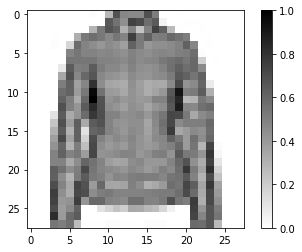

In [12]:

plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()

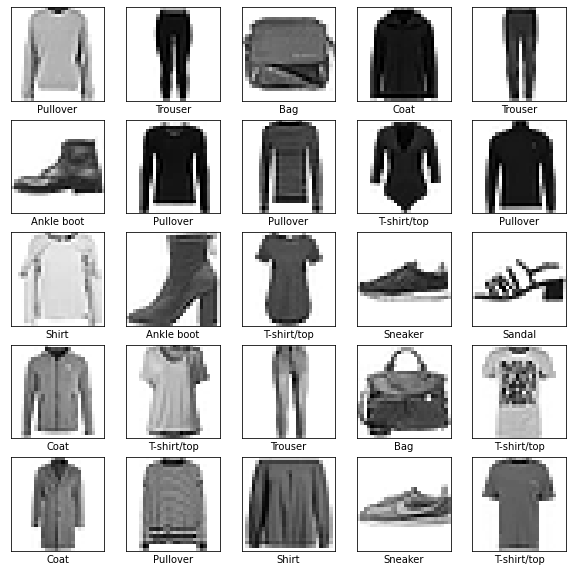

In [13]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(name_classes[label])


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), padding='same', activation=tf.nn.relu,
                          input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64,(3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    #hidden
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    #output
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:

BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(train_example).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [17]:
model.fit(train_dataset,epochs = 3, steps_per_epoch=math.ceil(train_example/BATCH_SIZE))

Epoch 1/3
1875/1875 [==============================] - 32s 16ms/step - loss: 0.3951 - accuracy: 0.8561
Epoch 2/3
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2619 - accuracy: 0.9047
Epoch 3/3
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2102 - accuracy: 0.9229


In [18]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(test_example/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.2633 - accuracy: 0.9040
Accuracy on test dataset: 0.9039999842643738


In [19]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [20]:
predictions.shape 

(32, 10)

In [21]:
predictions[1]

array([1.5173459e-05, 2.2978885e-08, 1.2789087e-03, 3.5058989e-07,
       7.5467384e-01, 5.5772087e-08, 2.4403106e-01, 7.2050923e-08,
       1.6147224e-07, 2.6405101e-07], dtype=float32)

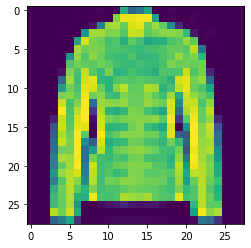

In [22]:
plt.imshow(test_images[1])

In [23]:
np.argmax(predictions[0])

4

In [24]:
print(name_classes[4])

Coat
